In [37]:
#importing necssary packages
import numpy as np
import pandas as pd
from cytoolz import *
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
tqdm.pandas()

In [38]:
df = pd.read_csv('hate_speech_topic_dataset.csv')

In [39]:
df.head()

,Unnamed: 0,문장,혐오 여부
0,0,솔직히 저런 대화는 남자들 사이에서 아무것도 아닌 대화지만 공개되는 순간 씹범죄자 ...,3
1,1,곤뇽이 되어가는군.....,0
2,2,imf로 우리나라 기업들 친중자본이 싹쓸어갔지 김영삼 김대중 이새끼들 중국새끼들 아...,2
3,3,여자가 약자라는 걸 ㅇㅈ해라\n\n장애인이랑 동급이라고 생각하면 편해,3
4,4,윤총경은?,0


In [40]:
len(df)

23594

In [41]:
df['문장'].isnull().values.any()

False

In [42]:
di = {0: "regions descrimination", 1: "dehumanizing political views", 2: "racist comments", 3: "gender hate speech"}
df.replace({"혐오 여부": di}, inplace = True)

In [43]:
train, test = train_test_split(df, train_size=.8, shuffle=False)

In [44]:
train.head()

,Unnamed: 0,문장,혐오 여부
0,0,솔직히 저런 대화는 남자들 사이에서 아무것도 아닌 대화지만 공개되는 순간 씹범죄자 ...,gender hate speech
1,1,곤뇽이 되어가는군.....,regions descrimination
2,2,imf로 우리나라 기업들 친중자본이 싹쓸어갔지 김영삼 김대중 이새끼들 중국새끼들 아...,racist comments
3,3,여자가 약자라는 걸 ㅇㅈ해라\n\n장애인이랑 동급이라고 생각하면 편해,gender hate speech
4,4,윤총경은?,regions descrimination


In [45]:
len(train)

18875

In [46]:
test.head()

,Unnamed: 0,문장,혐오 여부
18875,18875,정준 중간에 그만두고 ㅌㅌ하지 않았나?,dehumanizing political views
18876,18876,북한군에 흑인도있었냐?,racist comments
18877,18877,"소속사도 너무 듣보인데\n\n시크엔젤, 아이씨유 ㅋㅋㅋ\n\n상가건물 지하1층.\n...",dehumanizing political views
18878,18878,이게 민간인사찰 같은 거냐?,regions descrimination
18879,18879,ㅋㅋ\n재미있다.,regions descrimination


In [47]:
!pip install stanza

In [52]:
import spacy

In [ ]:
#importing spacy and defining our teokinzer
import stanza

nlp = stanza.Pipeline(lang='ko', processors='tokenize', tokenize_no_ssplit=True)
doc = nlp(train)

def tokenize(text):
    doc = nlp.tokenizer(text)
    return [t.norm_ for t in doc if not (t.is_space or t.is_punct or t.like_num)]

In [53]:
#import string
#punct = set(string.punctuation)
#def tokenize(text):
    #doc=nlp(text)
    #return [t.text for s in doc.sentences for t in s.tokens if not (t.text.isspace() or (t.text in punct))]

In [54]:
tokenize(train['문장'][4])

['윤총경은']

In [29]:
train

,Unnamed: 0,문장,혐오 여부
0,0,솔직히 저런 대화는 남자들 사이에서 아무것도 아닌 대화지만 공개되는 순간 씹범죄자 ...,gender hate speech
1,1,곤뇽이 되어가는군.....,regions descrimination
2,2,imf로 우리나라 기업들 친중자본이 싹쓸어갔지 김영삼 김대중 이새끼들 중국새끼들 아...,racist comments
3,3,여자가 약자라는 걸 ㅇㅈ해라\n\n장애인이랑 동급이라고 생각하면 편해,gender hate speech
4,4,윤총경은?,regions descrimination
...,...,...,...
18870,18870,전라도 해안가에서 저지랄하다가는.. 으미 이거슨 우리 재산인디 외지인이 가져가면 쓰...,regions descrimination
18871,18871,노좌표 ㅁㅈㅎ,dehumanizing political views
18872,18872,그럼 여자들이 발롱도르 뭔지 모르면 수상자들 다 좆밥???,gender hate speech
18873,18873,근데 누구냐? 만화 그리는 사람 같은데. 원혁?,dehumanizing political views


In [50]:
#importing spacy and defining our teokinzer
import stanza

nlp = stanza.Pipeline(lang='ko', processors='tokenize', tokenize_no_ssplit=True)
doc = nlp(train)

def tokenize(text):
    doc = nlp.tokenizer(text)
    return [t.norm_ for t in doc if not (t.is_space or t.is_punct or t.like_num)]

2021-05-04 00:58:29 INFO: Loading these models for language: ko (Korean):
| Processor | Package |
-----------------------
| tokenize  | kaist   |

2021-05-04 00:58:29 INFO: Use device: cpu
2021-05-04 00:58:29 INFO: Loading: tokenize
2021-05-04 00:58:29 INFO: Done loading processors!


AssertionError: input should be either str, list or Document

In [55]:
import multiprocessing as mp

In [57]:
tokenized_series = test["문장"].map(tokenize)

In [58]:
tokenized_series

18875                           [정준, 중간에, 그만두고, ㅌㅌ하지, 않았나]
18876                                       [북한군에, 흑인도있었냐]
18877    [소속사도, 너무, 듣보인데, 시크엔젤, 아이씨유, ㅋㅋㅋ, 상가건물, 지하1층.,...
18878                                  [이게, 민간인사찰, 같은, 거냐]
18879                                           [ㅋㅋ, 재미있다]
                               ...                        
23589                                          [신후게이야, ㅠㅠ]
23590    [최순실, 300조, 안민돌새끼는, 진짜, 사기죄로, 처넣어야함, 일본의, 무력에,...
23591                                    [경상도일, 확률, 1026%]
23592                            [개쌍도가주도하는질서전라도가기생충처럼나라를살]
23593    [아무래도, 우파로, 간, 김미균을, 시기하는, 좌파들의, 공작이, 시작, 된듯, 하다]
Name: 문장, Length: 4719, dtype: object

In [59]:
q = pd.concat([test, tokenized_series.rename('tokens')], axis = 1)
q.to_csv('test.csv')

In [60]:
q

,Unnamed: 0,문장,혐오 여부,tokens
18875,18875,정준 중간에 그만두고 ㅌㅌ하지 않았나?,dehumanizing political views,"[정준, 중간에, 그만두고, ㅌㅌ하지, 않았나]"
18876,18876,북한군에 흑인도있었냐?,racist comments,"[북한군에, 흑인도있었냐]"
18877,18877,"소속사도 너무 듣보인데\n\n시크엔젤, 아이씨유 ㅋㅋㅋ\n\n상가건물 지하1층.\n...",dehumanizing political views,"[소속사도, 너무, 듣보인데, 시크엔젤, 아이씨유, ㅋㅋㅋ, 상가건물, 지하1층.,..."
18878,18878,이게 민간인사찰 같은 거냐?,regions descrimination,"[이게, 민간인사찰, 같은, 거냐]"
18879,18879,ㅋㅋ\n재미있다.,regions descrimination,"[ㅋㅋ, 재미있다]"
...,...,...,...,...
23589,23589,신후게이야 ㅠㅠ,regions descrimination,"[신후게이야, ㅠㅠ]"
23590,23590,최순실 300조 안민돌새끼는 진짜 사기죄로 처넣어야함\n\n일본의 무력에 굴복해서 ...,regions descrimination,"[최순실, 300조, 안민돌새끼는, 진짜, 사기죄로, 처넣어야함, 일본의, 무력에,..."
23591,23591,경상도일 확률 1026%,gender hate speech,"[경상도일, 확률, 1026%]"
23592,23592,개쌍도가주도하는질서전라도가기생충처럼나라를살,dehumanizing political views,[개쌍도가주도하는질서전라도가기생충처럼나라를살]


In [131]:
train = pd.concat([train, tokenized_series.rename('tokens')], axis = 1)
d.to_csv('test.csv')

In [122]:
t.head()

,Unnamed: 0,문장,혐오 여부,tokens
0,0,솔직히 저런 대화는 남자들 사이에서 아무것도 아닌 대화지만 공개되는 순간 씹범죄자 ...,gender hate speech,"[솔직히, 저런, 대화는, 남자들, 사이에서, 아무것도, 아닌, 대화지만, 공개되는..."
1,1,곤뇽이 되어가는군.....,regions descrimination,"[곤뇽이, 되어가는군]"
2,2,imf로 우리나라 기업들 친중자본이 싹쓸어갔지 김영삼 김대중 이새끼들 중국새끼들 아...,racist comments,"[imf로, 우리나라, 기업들, 친중자본이, 싹쓸어갔지, 김영삼, 김대중, 이새끼들..."
3,3,여자가 약자라는 걸 ㅇㅈ해라\n\n장애인이랑 동급이라고 생각하면 편해,gender hate speech,"[여자가, 약자라는, 걸, ㅇㅈ해라, 장애인이랑, 동급이라고, 생각하면, 편해]"
4,4,윤총경은?,regions descrimination,[윤총경은]


In [61]:
train = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')

In [62]:
#looking at our categories
train["혐오 여부"].value_counts()

dehumanizing political views    4801
regions descrimination          4786
racist comments                 4658
gender hate speech              4630
Name: 혐오 여부, dtype: int64

In [63]:
#importing necessary sklearn tools needed to conduct analysis
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.pipeline import make_pipeline

In [64]:

test.head()

,Unnamed: 0,Unnamed: 0.1,문장,혐오 여부,tokens
0,18875,18875,정준 중간에 그만두고 ㅌㅌ하지 않았나?,dehumanizing political views,"['정준', '중간에', '그만두고', 'ㅌㅌ하지', '않았나']"
1,18876,18876,북한군에 흑인도있었냐?,racist comments,"['북한군에', '흑인도있었냐']"
2,18877,18877,"소속사도 너무 듣보인데\n\n시크엔젤, 아이씨유 ㅋㅋㅋ\n\n상가건물 지하1층.\n...",dehumanizing political views,"['소속사도', '너무', '듣보인데', '시크엔젤', '아이씨유', 'ㅋㅋㅋ', ..."
3,18878,18878,이게 민간인사찰 같은 거냐?,regions descrimination,"['이게', '민간인사찰', '같은', '거냐']"
4,18879,18879,ㅋㅋ\n재미있다.,regions descrimination,"['ㅋㅋ', '재미있다']"


In [65]:
train.head()

,Unnamed: 0,Unnamed: 0.1,문장,혐오 여부,tokens
0,0,0,솔직히 저런 대화는 남자들 사이에서 아무것도 아닌 대화지만 공개되는 순간 씹범죄자 ...,gender hate speech,"['솔직히', '저런', '대화는', '남자들', '사이에서', '아무것도', '아..."
1,1,1,곤뇽이 되어가는군.....,regions descrimination,"['곤뇽이', '되어가는군']"
2,2,2,imf로 우리나라 기업들 친중자본이 싹쓸어갔지 김영삼 김대중 이새끼들 중국새끼들 아...,racist comments,"['imf로', '우리나라', '기업들', '친중자본이', '싹쓸어갔지', '김영삼..."
3,3,3,여자가 약자라는 걸 ㅇㅈ해라\n\n장애인이랑 동급이라고 생각하면 편해,gender hate speech,"['여자가', '약자라는', '걸', 'ㅇㅈ해라', '장애인이랑', '동급이라고',..."
4,4,4,윤총경은?,regions descrimination,['윤총경은']


In [66]:
#establishing our baseline to determine a threshold to try to beat for our sgdclassifier
baseline = make_pipeline(CountVectorizer(analyzer=identity), SGDClassifier())
baseline.fit(train['tokens'], train["혐오 여부"])
base_predicted = baseline.predict(test['tokens'])
print(classification_report(test["혐오 여부"], base_predicted))

                              precision    recall  f1-score   support

dehumanizing political views       0.57      0.54      0.56      1199
          gender hate speech       0.82      0.49      0.62      1165
             racist comments       0.62      0.91      0.74      1142
      regions descrimination       0.70      0.69      0.70      1213

                    accuracy                           0.66      4719
                   macro avg       0.68      0.66      0.65      4719
                weighted avg       0.68      0.66      0.65      4719



In [67]:
#storing our model results to mlflow and visually see how our model did
import mlflow
from dask_ml.model_selection import RandomizedSearchCV
from logger import log_search
from scipy.stats.distributions import loguniform, randint, uniform

In [68]:
from warnings import simplefilter

simplefilter(action="ignore", category=FutureWarning)

In [69]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:46091")
client

Client Scheduler: tcp://127.0.0.1:46091 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 16.62 GB


In [70]:
#created a pipeline for sgdclassifier
mlflow.set_experiment("final-project-")
sgd = make_pipeline(
    CountVectorizer(analyzer=identity), TfidfTransformer(), SGDClassifier()
)

In [74]:
%%time

search = RandomizedSearchCV(
    sgd,
    {
        "countvectorizer__min_df": randint(1, 20),
        "countvectorizer__max_df": uniform(0.5, 0.5),
        "tfidftransformer__use_idf": [True, False],
        "sgdclassifier__alpha": loguniform(1e-6, 1e-2),
        
    },
    n_iter=50,
    scoring="f1_macro",
)
search.fit(train["tokens"], train["혐오 여부"])
log_search(search)

CPU times: user 2.08 s, sys: 286 ms, total: 2.36 s
Wall time: 44.5 s


In [75]:
%%time

search = RandomizedSearchCV(
    sgd,
    {
        "countvectorizer__min_df": randint(1, 20),
        "countvectorizer__max_df": uniform(0.5, 0.5),
        "tfidftransformer__use_idf": [True, False],
        "sgdclassifier__alpha": [2.39135e-05],
        
    },
    n_iter=50,
    scoring="f1_macro",
)
search.fit(train["tokens"], train["혐오 여부"])
log_search(search)

CPU times: user 2.24 s, sys: 277 ms, total: 2.51 s
Wall time: 44.9 s


In [76]:
#utilized values found for alpha, min, and max for our optimized model
sgd = make_pipeline(
    CountVectorizer(analyzer=identity, min_df=10, max_df=.9627),TfidfTransformer(use_idf=True), SGDClassifier(alpha=2.39135e-05)
)
sgd.fit(train["tokens"], train["혐오 여부"])
predicted = sgd.predict(test["tokens"])
print(classification_report(test["혐오 여부"], predicted))

                              precision    recall  f1-score   support

dehumanizing political views       0.61      0.61      0.61      1199
          gender hate speech       0.77      0.66      0.71      1165
             racist comments       0.83      0.82      0.83      1142
      regions descrimination       0.67      0.77      0.71      1213

                    accuracy                           0.71      4719
                   macro avg       0.72      0.72      0.72      4719
                weighted avg       0.72      0.71      0.71      4719



In [77]:
#this defines our labels and scores from our sgdclassifier
labels = sgd.named_steps['sgdclassifier'].classes_
scores = sgd.decision_function(test["tokens"])

In [78]:
#matrix of coefficients where there is a row for each class and a column for each feature, there is a weight for each word class pair
coef = sgd.named_steps['sgdclassifier'].coef_
labels, coef

(array(['dehumanizing political views', 'gender hate speech',
        'racist comments', 'regions descrimination'], dtype='<U28'),
 array([[ 1.76845286,  0.23775452,  0.8338794 , ...,  1.7564966 ,
          0.15936594,  0.23362388],
        [ 0.35377667, -0.07262151,  0.05825473, ...,  0.32575288,
         -0.11724887, -0.01939249],
        [ 0.2068329 ,  0.0642066 , -0.29285296, ...,  0.04588918,
          0.42147822,  0.45204413],
        [-1.60401114, -0.96080773, -0.82855893, ..., -1.60869114,
          0.58650064, -0.47278601]]))

In [79]:
vocab = sgd.named_steps['countvectorizer'].get_feature_names()

In [80]:
ranked = np.argsort(coef, axis=1)
for i, label in enumerate(labels):
    print(label)
    for j in concat([range(-1, -11, -1), range(10, 0, -1)]):
        print(f'  {vocab[ranked[i,j]]:15s} {coef[i, ranked[i,j]]:6.3f}')
    print()

dehumanizing political views
  좌                5.801
  선                3.366
  정                3.334
  옥                3.289
  뉴                3.151
  팩                3.139
  밍                3.092
  묻                2.871
  숨                2.843
  제                2.772
  전               -3.091
  짱               -3.475
  _               -3.494
  미               -3.625
  첩               -4.055
  중               -4.793
  혼               -5.306
  국               -5.912
  남               -7.169
  여               -7.193

gender hate speech
  여                9.777
  남                7.660
  섹                6.703
  혼                6.351
  자                6.095
  슴                5.608
  엄                5.299
  보                4.815
  결                4.767
  둑                4.125
  좌               -2.180
  죽               -2.270
  및               -2.330
  족               -2.336
  전               -2.602
  본               -2.738
  중               -3.741
  첩               -4.130
 

In [81]:
#looks at our highest score value
highest = scores.max(axis=1)

In [82]:
highest[0]

-0.8219894292231265

In [83]:
highest.argmax()

4341

In [84]:
scores[4341]

array([-8.06780237,  9.52250691, -7.23225969, -5.0850381 ])

In [85]:
test['혐오 여부'].iloc[4341]

'gender hate speech'

In [87]:
test['문장'].iloc[4341]

'여자'

In [88]:
highest.argmin()

3894

In [89]:
#sorts our scores
scores.sort(axis=1)
scores[0:5,:]

array([[-1.74037659, -1.63190733, -1.09222409, -0.82198943],
       [-5.58390191, -3.72401506, -1.80635744,  4.04493881],
       [-3.07119387, -2.51164379, -0.25767331,  0.76103089],
       [-2.255233  , -1.74494988, -1.30438367,  0.38216697],
       [-2.60828566, -1.79300642, -0.07257639,  0.50851278]])

In [90]:
margin = scores[:,3]-scores[:,2]

In [91]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'F1')

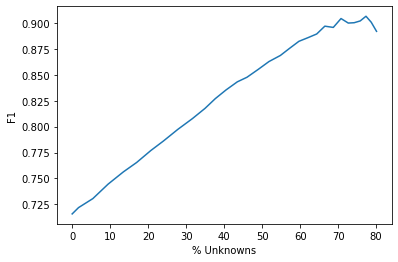

In [92]:
#plots graph
thresh = np.linspace(-2, 3, 50)
x = [100*(1-sum(margin > t)/len(margin)) for t in thresh]
y = [f1_score(test["혐오 여부"][margin > t], predicted[margin > t], average="macro") for t in thresh]
plt.plot(x, y)
plt.xlabel('% Unknowns')
plt.ylabel('F1')

In [93]:
#imports to create a confusiong matrix
from sklearn.metrics import classification_report, f1_score, plot_confusion_matrix

In [94]:
sgd

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(analyzer=<cyfunction identity at 0x7f72038da2b0>,
                                 max_df=0.9627, min_df=10)),
                ('tfidftransformer', TfidfTransformer()),
                ('sgdclassifier', SGDClassifier(alpha=2.39135e-05))])

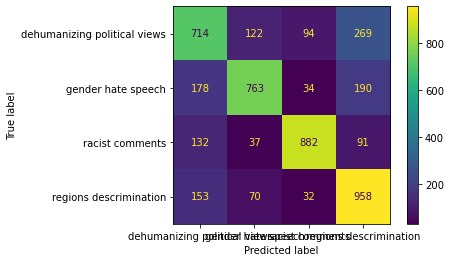

In [95]:
#the plotting of our sgd confusion matrix
plot_confusion_matrix(sgd, test["문장"], test["혐오 여부"])

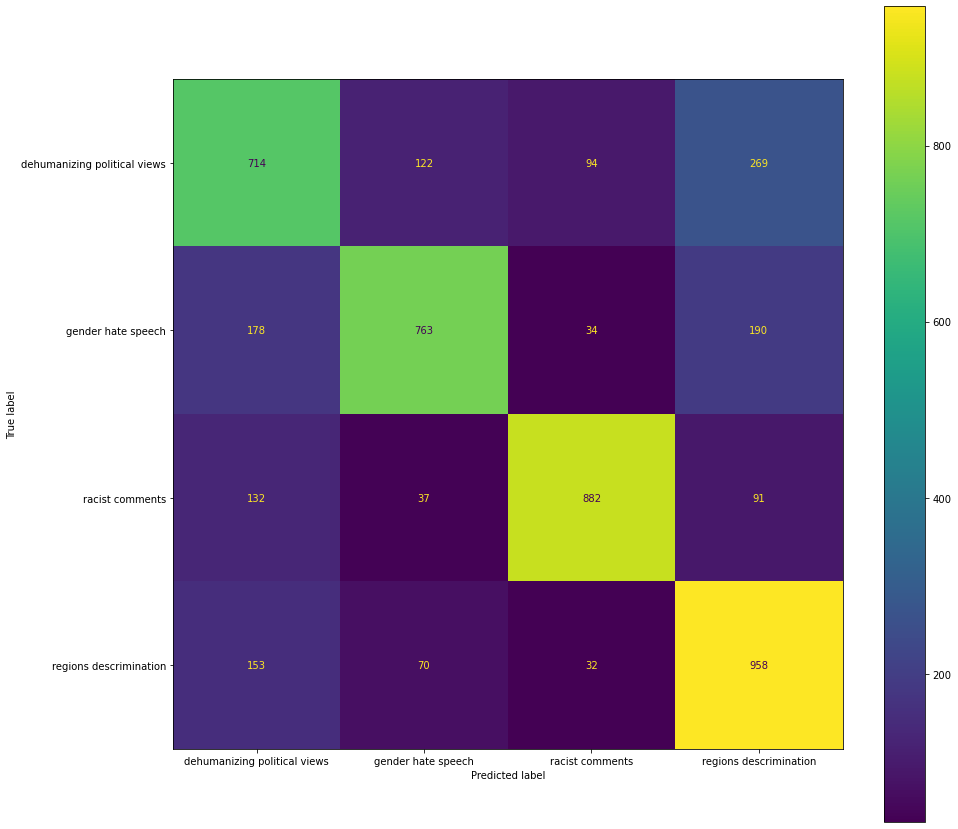

In [96]:
#readjusting the size of our confusion matrix to have the x- axis be more visible. Noticed that Pinot Noir and Cabernet Sauvignon have high values it could be considered that there are similarities between the two
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(sgd, test['문장'], test['혐오 여부'], ax=ax)

In [116]:
#creating copies of the original df
train_copy = train.copy()

In [117]:
test_copy = test.copy()

In [118]:
#defining 'm' for the wine variants i want to combine
m = train_copy['혐오 여부'].isin(['regions descrimination','dehumanizing political views'])

In [119]:
#combining the wine variants of cabernet sauvignon and pinot noir to be combined
train_copy['혐오 여부'] = train_copy['혐오 여부'].mask(m, 'RD / GHP')

In [120]:
train_copy["혐오 여부"].value_counts()

RD / GHP              9587
racist comments       4658
gender hate speech    4630
Name: 혐오 여부, dtype: int64

In [121]:
d = test_copy['혐오 여부'].isin(['regions descrimination','dehumanizing political views'])

In [122]:
test_copy['혐오 여부'] = test_copy['혐오 여부'].mask(m, 'RD / GHP')

In [123]:
#establishing our baseline to determine a threshold to try to beat for our sgdclassifier
baseline = make_pipeline(CountVectorizer(analyzer=identity), SGDClassifier())
baseline.fit(train_copy["문장"], train_copy["혐오 여부"])
base_predicted = baseline.predict(test_copy["문장"])
print(classification_report(test_copy["혐오 여부"], base_predicted))

                              precision    recall  f1-score   support

                    RD / GHP       0.51      0.58      0.54      2450
dehumanizing political views       0.00      0.00      0.00       602
          gender hate speech       0.36      0.57      0.44       566
             racist comments       0.41      0.78      0.54       537
      regions descrimination       0.00      0.00      0.00       564

                    accuracy                           0.46      4719
                   macro avg       0.26      0.39      0.30      4719
                weighted avg       0.35      0.46      0.40      4719



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
